# Build your own Gillespie algorithm 


In this tutorial you will learn in detail about the ~~deterministic~~ *stochastic* formalism for the *temporal* modelling of *simple*\* chemical systems, and you will learn to write the *Gillespie algorithm*, from scratch, using Python 2.7.

\* the word *simple* referst to "spatially homogenous" (i.e. spatially uniform mixture of chemical species, as opposed to spatially varied, where you could find regions with higher concentrations of some molecules but not others).

As you can already imagine, there are many Gillespie algorithm scripts out there, available for you to download freely and use for your simulations. (In particular modifications of the Gillespie algorithm such as the reaction method (Gibson & Bruck) and the tau-leaping are very efficient.) We think it is advantageous in many ways to understand how this formalism is constructed. It will help you, for example, decide in what contexts this framework is more appropiate, and understand the reasons why you might get different results with the deterministic and stochastic approached.


### To note

If you would like to learn in detail about the *deterministic* framework for modelling the temporal evolution of simple chemical systems, we refer you to [this (coming soon)]() tutorial.

The tutorial you currently hold deals only with modelling the evolution of a chemical system, in *time*. If you would like to learn to desing a *spatial* model and simulate it, we refer you to [this (coming soon)]() tutorial.


### Structure of tutorial

In **Part 1** we introduce and characterise the stochastic framework as a mathematical model of simple systems of chemical reactions.

In **Part 2** we set the problem that needs to be solved, in precise mathematical formulation.

In **Part 3** we provide steps to help you build your own Gillespie agorithm.


### References

The tutorial is heavily based on Gillespie's original 1977 [paper](http://wwwf.imperial.ac.uk/~nsjones/gillespie_1977.pdf) and we will often  quote text directly from the paper. 

The Wikipedia [page](https://en.wikipedia.org/wiki/Mathematical_model) on Mathematical Models.


### Acknowledgements

This tutorial was make by Dr. Karin Sasaki (Centre for Biological Modelling at the European Molecular Biology Laboratory).


### To do

- Part 4
- Appendix A - Describe what a probability density function is and give simple examples.
- Appendix B - Derive the Chemical Master Equation, Prove that samples with Gillespie fall under the probability density function that follows the CME
- Include the following somehow: 
    * The Gillespie algorith makes an exact numerical calculations within the framework of the stochastic formulation 
without having to deal with the master equation directly (which is a good thing because the master equation is often mathematically intractable). 
    * Unlike most procedures for numerically solving the deterministic reaction-rate equations, this algorithm never approximates infinitesimal time increments dt by finite time steps.
- Create an exercises version and a solutions version    

## Part 1. Characterisation of stochastic mathematical models of the time behaviour of  spatially homogenous chemical systems.

### The *stochastic approach* or framework:

1.  The time evolution is regarded as a kind of random-walk process. (A *deterministic model*, in contrast, regards the time evolution as a continuous, wholly predictable process.)
2. The time evolution of the system is governed by a single differential-difference equation called the “master equation” or is computationally calculated exactly by the Gillespie algorithm. (In a *deterministic model*, the time evolution of the system is governed by a set of coupled, ordinary differential equations called the “reaction-rate equations”.)


### Reasoning behind the stochastic framework

1. The time evolution of a chemically reacting system is not a continuous process, because molecular population levels obviously can change only by discrete integer amounts. 
2. The time evolution is not a deterministic process, for, the molecular motions are regarded to be governed by the equations of classical mechanics, it is impossible to predict the exact molecular population levels at some future time, unless we take account of the precise positions and velocities of all the molecules in the system. In other words, although the temporal behavior of a chemically reacting system of classical molecules is a deterministic process in the full position-momentum phase space of the system, it is not a deterministic process in the N-dimensional subspace of the species population numbers.


### Classification of stochastic models as mathematical models

* **The stochastic model is linear (not nonlinear)** - because chemical reactions exihibit linear relationships between the reactants. For example, an enzymatic reaction 
    
    S + E <-> SE -> E + P
    
is broken down into

    S + E -> SE
    SE -> S + E
    SE -> E + P
    
which all have linear relations between the reactants and products. Note that a linear model does not necessarily predic non-linear expressions.

* **Stochastic models are dynamic (not static i.e. time-invariant)** -  because they accounts for time-dependent changes in the state of the system. (A *static model* calculates the system in equillibrium. An example is Flux Balance Analysis of metabolic models using linear programming).

* **Stochastic models are explicit** -  all of the input parameters of the overall model are known, and the output parameters can be calculated by a finite series of computations 

* **Stochastic models are discrete** - objects are treated as discrete entities. (A *continuous model* represents the objects in a continuous manner, for example, chemical reactions can be regarded as a continuous rate processes e.g. 1/s).

* **Stochastic models are probabilistic and not deterministic** - randomness is included in the model in order to capture inherent fluctuations in the molecular population levels. Therefore variable states are described by probability distributions and these models can perform differently for the same set of initial conditions. (A deterministic model is one where the variable states are uniquely determined by parameters in the model and by sets of previous states of these variables. Therefore, a deterministic model always performs the same way for a given set of initial conditions.)

# Part 2. Setting the problem and translating it into mathematical formalism

### The problem we want to solve

The system:

M chemical reactions `R1, ... ,RM` that involve `N` chemical species `S1, ..., SN`.  

The question:

Given `X1, ..., XN` number of particles for each of the species, at some initial time, what will these molecular population levels be at a later time?


### Modelling the system stochastically - Translating of the problem into stochastic language 

#### Assumptions of the stochastic framework

1. A fixed volume `V` 
2. `V` contains a spatially uniform mixture of `N` chemical species
3. The chemical species are in thermal (but not necessarily chemical) equilibrium, which means that collisions occur in an essentially random manner.
3. A chemical reaction occurs whenever two or more molecules of "appropriate kinds" (defined by the reaction equations) collide in an "appropriate way" (assuming that the two molecules `S1` and `S2` are hard spheres of radii `rl` and `r2`, a collision will occur between them whenever the center-to-center distance between the two molecules decreases to `r12= r1 + r2`). 
4. All collisions are reactive, i.e. they result in chemical alterations of the colliding molecules as defined by the reaction equations.


#### A simple chamical system modelled stochastically is characterised by a "collision/reaction probability per unit time" (i.e. it is a stochastic Markov process) and not by a "collision rate" (i.e. a deterministic rate process)

Suppose we have two molecules `S1` and `S2`. Whilst we cannot rigorously calculate *the number of collisions* between `S1` and `S2`, occurring in `V` in any infinitesimal time interval, we can rigorously calculate *the probability of a collision* occurring between `S1` and `S2`, in `V` in any infinitesimal time interval (shown below).

**Side note:** A stochastic Markov process is one that satisfies the so called *Markov property*, which says that the conditional probability distribution of future states of a process depends only upon the present state, not on the sequence of events that preceded it. (Compare this with the deterministic framework which assumes that the any future state of the system is determined by previous states and specifically the initial state of the system.)


#### Calculating the propensity of each reaction (the collision/reaction probability per unit time)

Let's begin with an **example**. Suppose the `S1` and `S2` molecules in `V` can undergo the reaction

```
R1: S1 + S2 -> 2S1
```

Then we may assert the existence of a constant `cl`, which depends only on the physical properties of the two molecules and the temperature of the system, such that `c1*dt` is *the average probability that a particular `S1-S2` molecular pair will react according to `R1` in the next infinitesimal time interval `dt`*.

This implies that, if at time `t` there are `X1` of the `S1` molecules and `X2` of the `S2` molecules, making a total of `h1 = Xl*X2` distinct `S1-S2` pairs. Let `a1=h1*c1` then `a1*dt` is *the probability that an `R1` reaction will occur somewhere inside `V` in the next infinitesimal time interval `(t, t + dt)`*.

<img src="diag.png" style="width: 400px;"/>

Let us take another example. Consider the reverse of the reaction of `R1`:

```
R2: 2S1 -> S1 + S2
```

Then we would characterize this reaction by a constant `c2`, such that `c2*dt` is the average probability that a particular pair of `S1` molecules will react according to `R2` in the next `dt`. However, the number of distinct pairs of `S1` molecules in `V` is not `X1*X1` but `h2 = X1*(X1-1)/2!`. . Let `a2=h2*c2`. Hence, the probability that an `R2` reaction will occur somewhere inside `V` in the next time interval `dt` is `a2*dt`. 

Now, for the **general form**, suppose the volume `V` contains a mixture of `Xj` molecules of chemical species `Sj (j = 1, ..., N)` and suppose further that these `N` species can interreact through `M` specified chemical reaction channels `Ri (i = 1, ..., M)`. Then we may assert the existence of `M` constants `ci (i =  1, ..., M)`, which depend only on the physical properties of the molecules and the temperature of the system, such that `ci*dt` is the *the average probability that a particular combination of `Ri` reactant molecules will react accordingly in the next infinitesimal time interval dt*. 

Let `hi` be the total number of distinct combinations of `R_i` reactant molecules in `V` at time `t` (a simple algebraic expression calculated using the binomial coefficient of the stoichiometry of the reactants). Then, if we multiply `ci*dt` by `hi`, we will obtain the probability `ai*dt` (where `ai=hi*ci`) that an `Ri` reaction will occur somewhere inside `V` in the next infinitesimal time interval `(t, t + dt)`.

**In summary**:
- *the propensity of a reaction* `Ri (i = 1, ..., M)` is governed solely by the fundamental hypothesis that, for  constants `ci`, which depends only on the physical properties of the reactants of `Ri`, `ci*dt` is *the average probability that the particular combination of `Ri` reactant molecules will react in the next infinitesimal time interval dt*. 
- furthermore, the probability of reaction `Ri` happening in the next time interval `(t, t + dt)` is calculated as the product `hi` of the total number of distinct combinations of `Ri` reactant molecules and `ci*dt`, i.e. `ai*dt` for `ai=hi*ci`.



#### Calculating the time evolution of the system (that is modelled stochastically)

Let us consider how to sample the time evolution of this system in a way that it follows the probability density function of the Chemical Master Equation. Remember that the system is a Markov process, so it is enough to base the argument on the current state of the system. 

If we are given that the system is in the state `(X1,...,XN)` at time `t`,  essentially all we need in order to “move the system forward in time” is to answer these two questions: 

1. when will the next reaction occur, and 
2. what kind of reaction will it be 

One way to obtain the next time `T` and reaction `mu`, could be to draw two random numbers `r1` and `r2` from the normal distribution and to use them to calculate the next time and reaction by:

<img src="c2.png" style="width: 180px;"/>

<img src="a0.png" style="width: 350px;"/>

<img src="a.png" style="width: 100px;"/>

(Note that this relies on the propensities of the reactions that we calculated just above.)

It is shown in Gillespie's paper that choosing the next time and reaction in this way, samples directly from the *probability density function* that is the Chemical Master Equation. (Note that this probability density function is a joint probability density function (also knows as a probability measure) of the continuous variable T (0<= T < inf), for the time of the next reaction, and the discrete variable (mu = 1, 2,. ..,M).)

So, to simulate a stochastic model of any simple chemical system you can just follow this algorithm (the Gillespie algorithm):

<img src="b.png" style="height: 400px;"/>

and you already have all the tools you need to calculate each step.

## Part 3. The stochastic simulation algorithm

Now that we have the algorithm, we can program it into python so that we can then use it to simulate any simple chemical system.


### Let's go through one loop of the algorithm, each step (sort of) by hand

We will use the following example system:

```
R1: S1 + S2 -> 2S1
```

For each of the steps, follow the instructions and hints and if necessary, check the python documentation.

Import the required libraries and modules

In [1]:
# import modules and libraries
import numpy as np
from scipy.special import factorial
import matplotlib.pyplot as plt
%matplotlib inline

**Step 0 - Initialization:** 
- Input the desired values for the `M` reaction constants `c1,. ..,cM` and the `N` initial molecular population numbers `X1,...,XN`. 
- Set the time variable `t` and the reaction counter `n` both to zero. 

In [64]:
# reaction constants
c1 = 0.1
print "c1: ", c1

# initial molecular population numbers of S1 and S2
X1 = 10
X2 = 1000
print "X1: ", X1
print "X2: ", X2

# initialise time variable t and reaction counter n
t = 0
n = 0
print "t: ", t
print "n: ", n

 c1:  0.1
X1:  10
X2:  1000
t:  0
n:  0


**Step 1 - calculate the ai and a0: ** 
- Calculate and store the `M` quantities `a1 = h1*c1,..., aM = hm*cm` for the current molecular population numbers. 
- To fasciliate the manipulation with python, save all the `ai`'s in an array `a`.
- Calculate and store as `a_0` the sum of the `M` `a_i` values.

In [65]:
a1 = X1*X2*c1
a = np.array([a1])
a0 = sum(a)

print "a1: ", a1
print "a: ", a
print "a0: ", a0

a1:  1000.0
a:  [ 1000.]
a0:  1000.0


**Step 2 - Get the next reaction and time of reaction: ** 

- Generate the pair `(T, mu)` from the set of random pairs whose probability density function is the Chemical Master Equation.
- When calculating the next reaction, you need a while loop.
- Recall that numbering in Python starts from 0, so be careful with indexing!

In [66]:
# generate random numbers from the normal distribution
r = np.random.random(2)
r1 = r[0]
r2 = r[1]
print "r1: ", r1
print "r2: ", r2

# find the increment in time
dt = (1/a0)*np.log(1/r1)
print "dt: ", dt

# choose next reaction
S = sum(a)
mu = 0
N = r2*S - a[mu]

while N > 0:
    mu = mu + 1
    N = N - a[i]

next_r = mu
print "next_r: ", next_r

r1:  0.97235476334
r2:  0.635308247612
dt:  2.80345582521e-05
next_r:  0


Does it make sense what the next reaction is?

What happens if you run the code again? Does the same reaction get chosen? Does this make sense?

**Step 3 - update the system: ** 

Using the `T` and `mu` values obtained in step 2, increase `t` by `T`, and adjust the molecular population levels to reflect the occurrence of one `R_i` reaction; e.g., if `R_i` is the reaction `R1`, then increase `X1` by `1` and decrease `X2` by `1`. Then increase the reaction counter `n` by `1`.

(Note that it is enough to recalculate only those quantities `a_i` corresponding to reactions `R_i` whose reactant population levels were just altered in step 3; also, `a_0` may be recalculated simply by adding to `a_0` the difference between each newly changed `a_i` value and its corresponding old value.)

In [67]:
# time of next reaction
t = t + dt
print "t: ", t

# next reaction
n = n + 1
print "n: ", n

# updated system
X1 = 11
X2 = 999
print "X1: ", X1
print "X2: ", X2

t:  2.80345582521e-05
n:  1
X1:  11
X2:  999


We have simulated the stochastic occurance of one reaction. We can visualise the effect of this reaction by plotting the time vs the concentration of the reactants as follows:

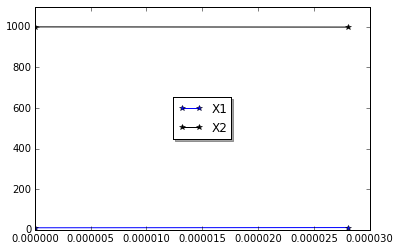

In [68]:
# create array containing all data
X1_all = np.array([10, 11]) # initial number and number after one reaction
X2_all = np.array([1000,999]) # initial number and number after one reaction
t_all = np.array([0, t]) # initial time and time of one reaction

# create plot
fig, ax = plt.subplots()
plt.ylim((0,1100))
ax.plot(t_all, X1_all, '-*', label='X1')
ax.plot(t_all, X2_all, 'k-*', label='X2')
legend = ax.legend(loc='center', shadow=True)
plt.show()

Return to 1 and repeat.

So now, we need to do the same process many many times, to simulate the system to a maximum time (`tmax`) or maximum number of reactions (`nmax`) of our choice. 

It is not feasible to carry on typing the same commands every time we need to go through the loop until we reach either `tmax`or `nmax` and we need to implement an automated way of **looping** through the algorithm.

So what should we use? You've guessed it - a while loop, because with a while loop we can test whether the `tmax` or `nmax` bounds have been reached and *while* they have not, we go through yet another loop.

Additionally, to be able to visualise the output of every loop, we will also want to provide an automated way of storing the changing values of the reactants, rather than doing it by hand as we did above.

Finally, remember to implement a debugging strategy. We recommend defining a *pause* function that will ask the user to press the `<ENTER>` key to continue and to print values that will help you keep track of the algorithm.

We will use a system that has more than one reaction to assist us in writting a general algorithm - one that can simulate any system. Let's use the following system:
```
R1: 2X1 + X2 -> X3
R2: X1 -> 0
```


### **Step 0 - Set up**

In [69]:
# import required libraries and modules
import numpy as np
from scipy.special import factorial
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
# define a pause function for debugging
def pause():
    programPause = raw_input("Press the <ENTER> key to continue...")

In [77]:
# ****************************   
# step 0: input rate values, initial contidions values and initialise time 
# and reactions counter
# ****************************   

# define the stoichiometry of the system as a numpy array
# with row the number of reactions and columns number of reactants
# keep track of the following:
# (i ranges 0 -> M-1, where M is the number of reactions, j ranges 0 -> N-1, 
# where N is the number of species)
# define also the stochiometry of the substrates and products separatelly

stoch_subst = np.array([[-2,-1,0],[-1,0,0]])
stoch_prods = np.array([[0,0,1],[0,0,0]])
stoch = stoch_subst + stoch_prods
s = np.shape(stoch)
num_rxn = s[0]
num_spec = s[1]

# define the ci parameters (rates)
rates = np.array([0.01,1])

# define the initial conditions of the reactants
init = np.array([90, 3,0])

# define the maximum time, tmax, and and maximum number of reactions, nrmax
tmax = 1
nrmax = 80

# initialise current time and current species variables and the time and reaction counter
current_t = 0
current_species = init
t_count = 0
react_count = 0

# debug
print "stoch_subst:", '\n',  stoch_subst, '\n', 'stoch_prods:', '\n', stoch_prods, '\n', "stoch:", '\n', stoch, '\n', "s:", '\n', s, '\n', "num_rxn:", '\n', num_rxn, '\n', "num_spec:", '\n', num_spec, '\n', "rates:", '\n', rates, '\n', "init:", '\n', init, '\n', "tmax:", '\n', tmax, '\n', "nrmax:", '\n', nrmax, '\n', "current_t:", '\n', current_t, '\n', "current_species:", '\n', current_species, '\n', "t_count:", '\n', t_count, '\n', "react_count:", '\n', react_count
#pause() 

 stoch_subst: 
[[-2 -1  0]
 [-1  0  0]] 
stoch_prods: 
[[0 0 1]
 [0 0 0]] 
stoch: 
[[-2 -1  1]
 [-1  0  0]] 
s: 
(2, 3) 
num_rxn: 
2 
num_spec: 
3 
rates: 
[ 0.01  1.  ] 
init: 
[90  3  0] 
tmax: 
1 
nrmax: 
80 
current_t: 
0 
current_species: 
[90  3  0] 
t_count: 
0 
react_count: 
0


In [78]:
# initialise variables to store time and molecule numbers
largenum = 2*nrmax
store_t = np.zeros((largenum, 1))
store_mols = np.zeros((largenum, num_spec))
store_r = np.zeros((largenum, 1))

# debug
print "type(store_t):", '\n', type(store_t), '\n', "np.shape(store_t):", '\n', np.shape(store_t), '\n', "type(store_mols):", '\n', type(store_mols), '\n', "np.shape(store_mols)", '\n', np.shape(store_mols)
#pause() 

type(store_t): 
<type 'numpy.ndarray'> 
np.shape(store_t): 
(160, 1) 
type(store_mols): 
<type 'numpy.ndarray'> 
np.shape(store_mols) 
(160, 3)


In [79]:
# store current time and state of system
store_t[t_count] = current_t
store_mols[t_count,:] = current_species

# debug
print "store_t[0:10]:"
print store_t[0:10]
print 'store_mols[0:10,:]:'
print store_mols[0:10,:]
#pause()

store_t[0:10]:
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
store_mols[0:10,:]:
[[ 90.   3.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]]


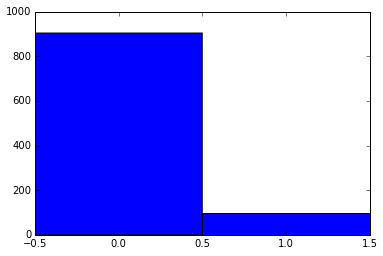

In [80]:
# define a function to choose the next time and reaction
def choose_t_r(a0,a):
    
    # generate random numbers
    r = np.random.random(2)
    r1 = r[0]
    r2 = r[1]
    
    # choose next time
    T = (1/a0)*np.log(1/r1)
    
    # choose next reaction (i ranges 1 -> M, where M is the number of reactions)
    S = sum(a)
    i = 0
    N = r2*S - a[i]

    while N > 0:
        i = i + 1
        N = N - a[i]

    next_r = i
    
    return T, next_r 

# debug - test choose_t_r

# Run choose_t_r 1000 times and by changing the values of a, make sure that different 
# reactions are being chosen representatively with the system.
# For example, for a = np.array([9000*0.0001, 10*1]) the proportions of choosing reaction 
# R1 or R2 should be similar, around 1:1, but for a = np.array([9000*0.01, 10*1]) R1 should be chosen
# many more times than R2, in fact, on a ratio of around 10:1.
# Make a histogram to visualise the result.

# define function to run choose_t_r
def run_choose_t_r_many_times(a):
    a0 = sum(a)
    
    r = np.zeros((1000,1))

    for i in range(1000):
        #print "simulation: ", i
        res = choose_t_r(a0,a)
        #print "reaction chosen: ", res[1]
        r[i] = res[1]
        #print "r: ", r[:10]
    
    # histogram the reactions chosen
    bins = np.array([-0.5,0.5,1.5])
    plt.hist(r, bins)
    
# run choose_t_r for different settings
#a = np.array([9000*0.0001, 10*1])
a = np.array([9000*0.01, 10*1])
run_choose_t_r_many_times(a)

In [81]:
# Think about how exactly to calculate the algebraic statement that equals ai = hi*ci.
# It is helpful to write down many example in order to come up with a formula.
# 
# .
# .
# .
# 
# If you did hand calculations, you will see that you need to use #the binomial coefficient. 
#
# In fact, to calculate hi you need the following formula
# hi = hi*binom(current_species[j],np.absolute(stoch_subst[i,j]))*factorial(np.absolute(stoch_subst[i,j]))
# python does not seem to have a binomial coefficient function, so we define it here

# define a function to calculate the binomial coefficient
def binom(n,m):
    b=[0]*(n+1)
    b[0]=1
    for i in xrange(1,n+1):
        b[i]=1
        j=i-1
        while j>0:
            b[j]+=b[j-1]
            j-=1
    return b[m]

# debug - test binom
print binom(5,0), binom(5,1), binom(5,2), binom(5,3), binom(5,4), binom(5,5)
#pause()

1 5 10 10 5 1


In [82]:
# Now we write the main loop

print "current_species: ", current_species
print "rates: ", rates

# while main loop
while react_count < nrmax:
    
    # ****************************   
    # step 1: calculate ai and a0
    # ****************************   
    
    # debug
    print "step 1: calculate ai and a0"
    
    a = np.ones((num_rxn,1))
    
    # (recall i ranges 1 -> M, where M is the number of reactions, j ranges 1 -> N, where N is the number of species)
    for i in range(num_rxn):
        hi = 1
        for j in range(len(init)):
            
            # check the reactant is involved in this reaction
            if stoch_subst[i,j] == 0:
                continue
            else:
                    
                # check the reactant has molecules available
                
                    # if it does not, go to the next reactant
                if current_species[j] <= 0:
                    to_print = "Reactant X{} has {} molecules".format(j,0)
                    print to_print
                    hi = 0
                    continue
                
                    # if it does, calculate hi
                else:
            
                    # debug
                    print "reaction (i):", i
                    print "reactant (j):", j
                    print "current_species[j]:", current_species[j]
                    print "stoch_subst[i,j]:", stoch_subst[i,j]
                    print "np.absolute(stoch_subst[i,j]):", np.absolute(stoch_subst[i,j])
                    print "binom(current_species[j],np.absolute(stoch_subst[i,j]):", binom(current_species[j],np.absolute(stoch_subst[i,j]))            
                    print "factorial(np.absolute(stoch_subst[i,j])):", factorial(np.absolute(stoch_subst[i,j]))
                    print "int(factorial(np.absolute(stoch_subst[i,j]))):", int(factorial(np.absolute(stoch_subst[i,j])))
                    print "binom(current_species[j],np.absolute(stoch_subst[i,j]))*factorial(np.absolute(stoch_subst[i,j])):", binom(current_species[j],np.absolute(stoch_subst[i,j]))*factorial(np.absolute(stoch_subst[i,j]))            
                    #pause()

                    #hi = hi*binom(init[j],np.absolute(stoch_subst[i,j]))*factorial(np.absolute(stoch_subst[i,j]))
                    hi = hi*binom(current_species[j],np.absolute(stoch_subst[i,j]))*factorial(np.absolute(stoch_subst[i,j]))

                    # debug
                    print "hi: ", hi
        
        # debug
        print "hi: ", hi
        a[i] = hi*rates[i]

        # debug
        print "a[i]: ", a[i]
        #pause()
        
    a0 = sum(a)
    print a0
    
    # ****************************   
    # step 2: choose next t and r
    # ****************************   

    # debug
    print "step 2: choose next t and r"

    tr = choose_t_r(a0,a)
    dt = tr[0]
    next_r = tr[1]
    
    # debug
    print dt, next_r
    print "next_r should be an integer"
    #pause()
    
    # ****************************   
    # step 3: update and store system
    # ****************************   
    
    # debug
    print "step 3: update and store system"
                          
    # debug
    print current_t, current_species
    #pause()

    # update system
    current_t = current_t + dt
    current_species = current_species + np.transpose(stoch[next_r,:])
    
    # debug
    print current_t, current_species
    #pause()
    
    # debug
    print "t_count:", t_count
    print "react_count:", react_count
    #pause()
    
    # update time counter and reaction counter
    t_count = t_count + 1
    react_count = react_count + 1
    
    # debug
    print "t_count:", t_count
    print "react_count:", react_count
    #pause()
    
    # store current system
    store_t[t_count] = current_t
    store_mols[t_count,:] = current_species 
    store_r[t_count] = next_r

    # debug
    print store_t[0:10], store_mols[0:10,:]
    #pause()

current_species:  [90  3  0]
rates:  [ 0.01  1.  ]
step 1: calculate ai and a0
reaction (i): 0
reactant (j): 0
current_species[j]: 90
stoch_subst[i,j]: -2
np.absolute(stoch_subst[i,j]): 2
binom(current_species[j],np.absolute(stoch_subst[i,j]): 4005
factorial(np.absolute(stoch_subst[i,j])): 2.0
int(factorial(np.absolute(stoch_subst[i,j]))): 2
binom(current_species[j],np.absolute(stoch_subst[i,j]))*factorial(np.absolute(stoch_subst[i,j])): 8010.0
hi:  8010.0
reaction (i): 0
reactant (j): 1
current_species[j]: 3
stoch_subst[i,j]: -1
np.absolute(stoch_subst[i,j]): 1
binom(current_species[j],np.absolute(stoch_subst[i,j]): 3
factorial(np.absolute(stoch_subst[i,j])): 1.0
int(factorial(np.absolute(stoch_subst[i,j]))): 1
binom(current_species[j],np.absolute(stoch_subst[i,j]))*factorial(np.absolute(stoch_subst[i,j])): 3.0
hi:  24030.0
hi:  24030.0
a[i]:  [ 240.3]
reaction (i): 1
reactant (j): 0
current_species[j]: 90
stoch_subst[i,j]: -1
np.absolute(stoch_subst[i,j]): 1
binom(current_species[j],

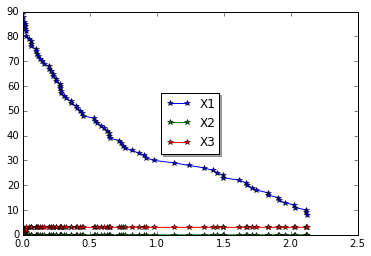

(array([  4.,  76.]), array([-0.5,  0.5,  1.5]), <a list of 2 Patch objects>)

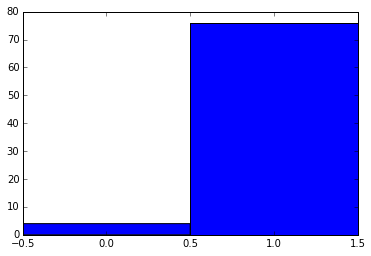

In [83]:
# store final output
store_t = store_t[:t_count]
store_mols = store_mols[:t_count,:]
store_r = store_r[:t_count]
                          
# plot of simulation
fig, ax = plt.subplots()
ax.plot(store_t, store_mols[:,0], '-*', label='X1')
ax.plot(store_t, store_mols[:,1], '-*', label='X2')
ax.plot(store_t, store_mols[:,2], '-*', label='X3')
legend = ax.legend(loc='center', shadow=True)
plt.show()

# histogram of reactions chosen by algorithm
bins = np.array([-0.5,0.5,1.5])
plt.hist(store_r, bins)

Awesome!! Now, it would be great if we could just call a function that would work for any set of reactions and that we can just run one line of code rather than the whole thing over and over again. You can now get rid of the debugging commands as we have tested every bit.

1 5 10 10 5 1
Loop:  0
step 1: calculate ai and a0
step 2: choose next t and r
step 3: update and store system
Loop:  1
step 1: calculate ai and a0
step 2: choose next t and r
step 3: update and store system
Loop:  2
step 1: calculate ai and a0
step 2: choose next t and r
step 3: update and store system
Loop:  3
step 1: calculate ai and a0
step 2: choose next t and r
step 3: update and store system
Loop:  4
step 1: calculate ai and a0
Reactant X1 has 0 molecules
step 2: choose next t and r
step 3: update and store system
Loop:  5
step 1: calculate ai and a0
Reactant X1 has 0 molecules
step 2: choose next t and r
step 3: update and store system
Loop:  6
step 1: calculate ai and a0
Reactant X1 has 0 molecules
step 2: choose next t and r
step 3: update and store system
Loop:  7
step 1: calculate ai and a0
Reactant X1 has 0 molecules
step 2: choose next t and r
step 3: update and store system
Loop:  8
step 1: calculate ai and a0
Reactant X1 has 0 molecules
step 2: choose next t and r
step 

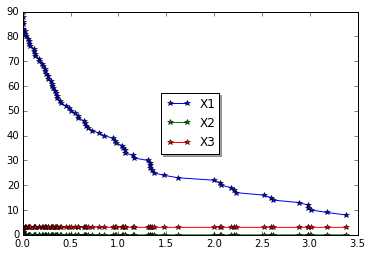

(array([  4.,  76.]), array([-0.5,  0.5,  1.5]), <a list of 2 Patch objects>)

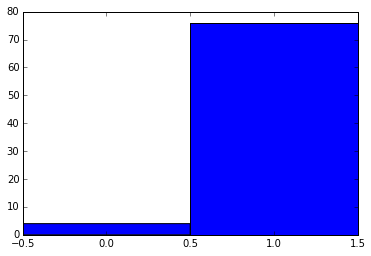

In [84]:
# ----------------------------
# ----------------------------
# IMPORT ALL NECESSARY LIBRARIES AND MODULES
# ----------------------------
# ----------------------------

# import required libraries and modules
import numpy as np
from scipy.special import factorial
import matplotlib.pyplot as plt
%matplotlib inline

# ----------------------------
# ----------------------------
# DEFINE OTHER FUNCTIONS NECESSARY
# ----------------------------
# ----------------------------

# define a pause function for debugging
def pause():
    programPause = raw_input("Press the <ENTER> key to continue...")
    

# define a function to choose the next time and reaction
def choose_t_r(a0,a):
    
    # generate random numbers
    r = np.random.random(2)
    r1 = r[0]
    r2 = r[1]
    
    # choose next time
    T = (1/a0)*np.log(1/r1)
    
    # choose next reaction (i ranges 1 -> M, where M is the number of reactions)
    S = sum(a)
    i = 0
    N = r2*S - a[i]

    while N > 0:
        i = i + 1
        N = N - a[i]

    next_r = i
    
    return T, next_r 


# define a function to calculate the binomial coefficient
def binom(n,m):
    b=[0]*(n+1)
    b[0]=1
    for i in xrange(1,n+1):
        b[i]=1
        j=i-1
        while j>0:
            b[j]+=b[j-1]
            j-=1
    return b[m]

# debug - test binom
print binom(5,0), binom(5,1), binom(5,2), binom(5,3), binom(5,4), binom(5,5)
#pause()


# ----------------------------
# ----------------------------
# DEFINE SIMULATION FUNCTION
# ----------------------------
# ----------------------------

def my_gillespie(init, rates, stoch_subst, stoch_prods, tmax, nrmax):
    
    # ****************************   
    # step 0: input rate values, initial contidions values and initialise time and reactions counter
    # ****************************   

    # define the stoichiometry of the system as a numpy array
    stoch = stoch_subst + stoch_prods
    s = np.shape(stoch)
    num_rxn = s[0]
    num_spec = s[1]

    # initialise current time and current speces variables and the time and reaction counter
    current_t = 0
    current_species = init
    t_count = 0
    react_count = 0

    # debug
    #print "stoch_subst:", '\n',  stoch_subst, '\n', 'stoch_prods:', '\n', stoch_prods, '\n', "stoch:", '\n', stoch, '\n', "s:", '\n', s, '\n', "num_rxn:", '\n', num_rxn, '\n', "num_spec:", '\n', num_spec, '\n', "rates:", '\n', rates, '\n', "init:", '\n', init, '\n', "tmax:", '\n', tmax, '\n', "nrmax:", '\n', nrmax, '\n', "current_t:", '\n', current_t, '\n', "current_species:", '\n', current_species, '\n', "t_count:", '\n', t_count, '\n', "react_count:", '\n', react_count
    #pause() 

    # initialise variables to store time and molecule numbers
    largenum = 2*nrmax
    store_t = np.zeros((largenum, 1))
    store_mols = np.zeros((largenum, num_spec))
    store_r = np.zeros((largenum, 1))

    # debug
    #print "type(store_t):", '\n', type(store_t), '\n', "np.shape(store_t):", '\n', np.shape(store_t), '\n', "type(store_mols):", '\n', type(store_mols), '\n', "np.shape(store_mols)", '\n', np.shape(store_mols)
    #pause() 

    # store current time and state of system
    store_t[t_count] = current_t
    store_mols[t_count,:] = current_species

    # debug
    #print "store_t[0:10]:"
    #print store_t[0:10]
    #print 'store_mols[0:10,:]:'
    #print store_mols[0:10,:]
    #pause()


    #print "current_species: ", current_species
    #print "rates: ", rates

    # while main loop
    while react_count < nrmax:
        
        # debug
        print "Loop: ", t_count

        # ****************************   
        # step 1: calculate ai and a0
        # ****************************   

        # debug
        print "step 1: calculate ai and a0"

        a = np.ones((num_rxn,1))

        # (i ranges 1 -> M, where M is the number of reactions, j ranges 1 -> N, where N is the number of species)
        for i in range(num_rxn):
            hi = 1
            for j in range(len(init)):

                # check the reactant is involved in this reaction
                if stoch_subst[i,j] == 0:
                    continue
                else:

                    # check the reactant has molecules available
                    if current_species[j] <= 0:
                        to_print = "Reactant X{} has {} molecules".format(j,0)
                        print to_print
                        hi = 0
                        continue
                    else:

                        # debug
                        #print "reaction (i):", i
                        #print "reactant (j):", j
                        #print "current_species[j]:", current_species[j]
                        #print "stoch_subst[i,j]:", stoch_subst[i,j]
                        #print "np.absolute(stoch_subst[i,j]):", np.absolute(stoch_subst[i,j])
                        #print "binom(current_species[j],np.absolute(stoch_subst[i,j]):", binom(current_species[j],np.absolute(stoch_subst[i,j]))            
                        #print "factorial(np.absolute(stoch_subst[i,j])):", factorial(np.absolute(stoch_subst[i,j]))
                        #print "int(factorial(np.absolute(stoch_subst[i,j]))):", int(factorial(np.absolute(stoch_subst[i,j])))
                        #print "binom(current_species[j],np.absolute(stoch_subst[i,j]))*factorial(np.absolute(stoch_subst[i,j])):", binom(current_species[j],np.absolute(stoch_subst[i,j]))*factorial(np.absolute(stoch_subst[i,j]))            
                        #pause()

                        #hi = hi*binom(init[j],np.absolute(stoch_subst[i,j]))*factorial(np.absolute(stoch_subst[i,j]))
                        hi = hi*binom(current_species[j],np.absolute(stoch_subst[i,j]))*factorial(np.absolute(stoch_subst[i,j]))

                        # debug
                        #print "hi: ", hi

            # debug
            #print "hi: ", hi
            
            a[i] = hi*rates[i]

            # debug
            #print "a[i]: ", a[i]
            #pause()

        a0 = sum(a)
        
        # debug
        #print a0

        # ****************************   
        # step 2: choose next t and r
        # ****************************   

        # debug
        print "step 2: choose next t and r"

        tr = choose_t_r(a0,a)
        dt = tr[0]
        next_r = tr[1]

        # debug
        #print dt, next_r
        #print "next_r should be an integer"
        #pause()

        # ****************************   
        # step 3: update and store system
        # ****************************   

        # debug
        print "step 3: update and store system"

        # debug
        #print current_t, current_species
        #pause()

        # update system
        current_t = current_t + dt
        current_species = current_species + np.transpose(stoch[next_r,:])

        # debug
        #print current_t, current_species
        #pause()

        # debug
        #print "t_count:", t_count
        #print "react_count:", react_count
        #pause()

        # update time counter and reaction counter
        t_count = t_count + 1
        react_count = react_count + 1

        # debug
        #print "t_count:", t_count
        #print "react_count:", react_count
        #pause()

        # store current system
        store_t[t_count] = current_t
        store_mols[t_count,:] = current_species 
        store_r[t_count] = next_r

        # debug
        #print store_t[0:10], store_mols[0:10,:]
        #pause()

    # store final output
    store_t = store_t[:t_count]
    store_mols = store_mols[:t_count,:]
    store_r = store_r[:t_count]
    
    return store_t, store_mols, store_r


# ----------------------------
# ----------------------------
# RUN SIMULATION
# R1: X1 + X2 -> 2X1
# R2: X1 -> 0
# ----------------------------
# ----------------------------

# ****************************
# step A: define rate values, initial contidions values, tmax and nrmax
# ****************************

# define the stochiometry of the substrates and products separatelly
stoch_subst = np.array([[-2,-1,0],[-1,0,0]])
stoch_prods = np.array([[0,0,1],[0,0,0]])

# define the ci parameters (rates)
rates = np.array([0.01,1])

# define the initial conditions of the reactants
init = np.array([90, 3,0])

# define the maximum time, tmax, and and maximum number of reactions, nrmax
tmax = 1
nrmax = 80

# ****************************
# step B: run simulation
# ****************************
results = my_gillespie(init, rates, stoch_subst, stoch_prods, tmax, nrmax)

# ****************************
# step C: plot results
# ****************************

# plot of simulation

# define vars
store_t = results[0]
store_mols = results[1]
store_r = results[2]

# plot results
fig, ax = plt.subplots()
ax.plot(store_t, store_mols[:,0], '-*', label='X1')
ax.plot(store_t, store_mols[:,1], '-*', label='X2')
ax.plot(store_t, store_mols[:,2], '-*', label='X3')
legend = ax.legend(loc='center', shadow=True)
plt.show()

# histogram of reactions chosen by algorithm
bins = np.array([-0.5,0.5,1.5])
plt.hist(store_r, bins)




Loop:  0
step 1: calculate ai and a0
Reactant X1 has 0 molecules
Reactant X1 has 0 molecules
Reactant X2 has 0 molecules
step 2: choose next t and r
step 3: update and store system
Loop:  1
step 1: calculate ai and a0
Reactant X2 has 0 molecules
step 2: choose next t and r
step 3: update and store system
Loop:  2
step 1: calculate ai and a0
step 2: choose next t and r
step 3: update and store system
Loop:  3
step 1: calculate ai and a0
step 2: choose next t and r
step 3: update and store system
Loop:  4
step 1: calculate ai and a0
step 2: choose next t and r
step 3: update and store system
Loop:  5
step 1: calculate ai and a0
step 2: choose next t and r
step 3: update and store system
Loop:  6
step 1: calculate ai and a0
step 2: choose next t and r
step 3: update and store system
Loop:  7
step 1: calculate ai and a0
step 2: choose next t and r
step 3: update and store system
Loop:  8
step 1: calculate ai and a0
step 2: choose next t and r
step 3: update and store system
Loop:  9
step 1

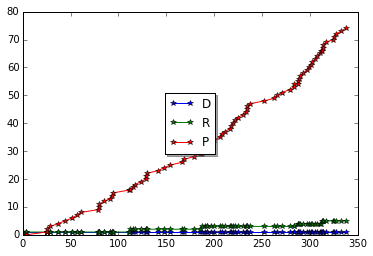

(array([  6.,  74.]), array([-0.5,  0.5,  1.5]), <a list of 2 Patch objects>)

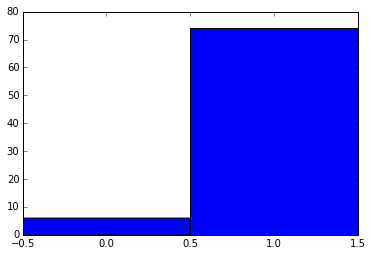

In [85]:
# ----------------------------
# ----------------------------
# RUN SIMULATION
# R1: D -> D + R
# R2: R -> R + P
# R3: R -> 0
# R4: P -> 0
# ----------------------------
# ----------------------------

# ****************************
# step A: define rate values, initial contidions values, tmax and nrmax
# ****************************

# define the stochiometry of the substrates and products separatelly
stoch_subst = np.array([[-1, 0, 0],[0, -1, 0], [0, -1, 0], [0, 0, -1]])
stoch_prods = np.array([[1,1,0],[0,1,1],[0,0,0],[0,0,0]])

# define the ci parameters (rates)
rates = np.array([0.01,0.1,0.0001,0.0001])

# define the initial conditions of the reactants
init = np.array([1,0,0])

# define the maximum time, tmax, and and maximum number of reactions, nrmax
tmax = 1
nrmax = 80

# ****************************
# step B: run simulation
# ****************************
results = my_gillespie(init, rates, stoch_subst, stoch_prods, tmax, nrmax)

# ****************************
# step C: plot results
# ****************************

# plot of simulation

# define vars
store_t = results[0]
store_mols = results[1]
store_r = results[2]

# plot results
fig, ax = plt.subplots()
ax.plot(store_t, store_mols[:,0], '-*', label='D')
ax.plot(store_t, store_mols[:,1], '-*', label='R')
ax.plot(store_t, store_mols[:,2], '-*', label='P')
legend = ax.legend(loc='center', shadow=True)
plt.show()

# histogram of reactions chosen by algorithm
bins = np.array([-0.5,0.5,1.5])
plt.hist(store_r, bins)

